In [1]:
import sys
sys.path.append("/home/edo/Software/TESI/AstroCosmoComputational/Students/Martinelli_Edoardo/")
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})
# Import distances class
from pyACC.cosmology import *
# Import integration class
from pyACC.Calculus import *
from pyACC.clustering import *
import scipy as sp

Text(0.5, 0, 'Z Label')

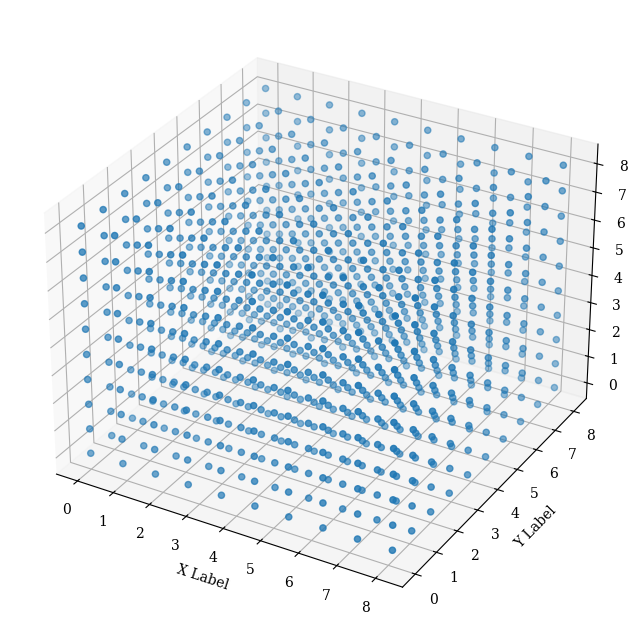

In [2]:
L=9
Nc=10
dx=L/Nc

x=np.arange(0,L,dx)
y=np.arange(0,L,dx)
z=np.arange(0,L,dx)

X,Y,Z=np.meshgrid(x,y,z)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X,Y,Z,marker='o',)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')        

In [3]:
distUN=np.ones((x.size,y.size,z.size))
ft=np.fft.fftn(distUN)
ps=np.real(ft*np.conj(ft)*L**3)
PS=ps.flatten()


In [4]:
arr=np.linspace(0,Nc-1,Nc)
kx=2*np.pi*(1/L)*arr
ky=2*np.pi*(1/L)*arr
kz=2*np.pi*(1/L)*arr

Kx,Ky,Kz=np.meshgrid(kx,ky,kz)

kmod=np.sqrt(Kx**2+Ky**2+Kz**2)
kmods=kmod.flatten()
print(arr)
print(kmods.size,PS.size)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
1000 1000


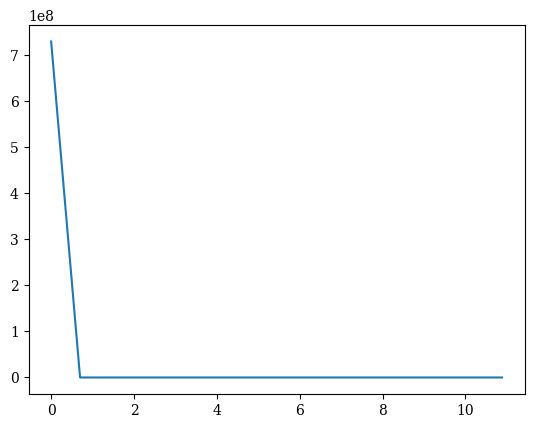

In [5]:
Ks=[]
Ps=[]
# this is the not binned version, in the function PowerSpectrum there is the binned version !
for i in range(0,kmods.size):
    if kmods[i] in Ks:
        continue
    else:
        Ks.append(kmods[i])
        Psmean=[]
        for j in range(0,kmods.size):
            if kmods[j]==kmods[i]:
                Psmean.append(PS[j])
        Ps.append(np.mean(Psmean))
plt.plot(Ks,Ps)       


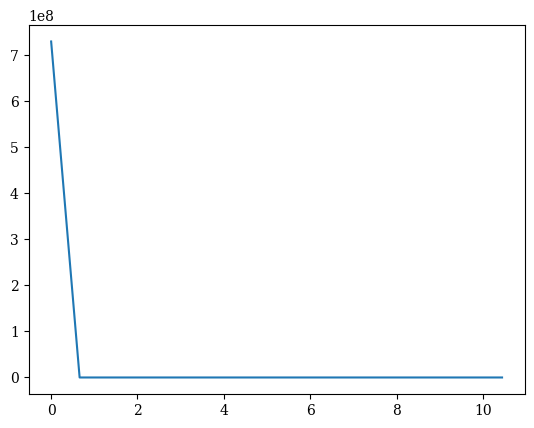

In [6]:
# binned version
powSpec=PowerSpectrum(distUN,L)
Ps=np.array(Ps)
plt.plot(powSpec[0],powSpec[1])

Now let's generate a distribution of 3D points and interpolate them on a 3D grid

In [11]:
Nsize=100

xint=np.linspace(0,L,Nsize)
yint=np.linspace(0,L,Nsize)
zint=np.linspace(0,L,Nsize)
random=np.random.rand(Nsize,Nsize,Nsize)*10
xgrid,ygrid,zgrid=np.meshgrid(xint,yint,zint)

interp_func=sp.interpolate.RegularGridInterpolator((xint,yint,zint),random)

interp=interp_func((xgrid,ygrid,zgrid))



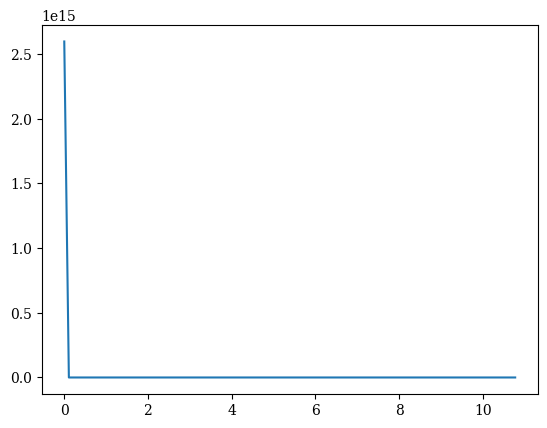

In [8]:
ks,ps=PowerSpectrum(interp,L)
plt.plot(ks,ps)